## _Build Your Own News Search Engine_
***
DESCRIPTION

Use text feature engineering (TF-IDF) and some rules to make our first search engine for news articles. For any input query, we’ll present the five  most relevant news articles. 

Problem Statement: 

Reuters Ltd. is an international news agency headquartered in London and is a division of Thomson Reuters. The data was originally collected and labeled by Carnegie Group Inc. and Reuters Ltd. in the course of developing the construe text categorization system. 

An important step before assessing similarity between documents, or between documents and a search query, is the right representation i.e., correct feature engineering. We’ll make a process that provides the most similar news articles to a given text string (search query).

Domain: News

Analysis to be done: Document similarity assessment to a search query using Tf-Idf

Content: 

Dataset: ‘r8-all-terms.txt’

Dataset has no header. For each row, it has a  label and the article text.


In [1]:
#import the libraries
import os 
import sys
assert sys.version_info >= (3,5)
#data manipulation
import pandas as pd
import numpy as np
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plot
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.labelsize'] = 12
#display options for dataframe
pd.options.display.max_columns = None
#text processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
#text feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
#regular expressions
import re
#string operations
import string
#ignore warnings
import warnings
warnings.filterwarnings(action='ignore',message='')
#compute articles similarity
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#load the data
news = pd.read_csv('r8-all-terms.txt',delimiter='\t',engine='python',names=['label','text'])
news.head()

,label,text
0,earn,champion products ch approves stock split cham...
1,acq,computer terminal systems cpml completes sale ...
2,earn,cobanco inc cbco year net shr cts vs dlrs net ...
3,earn,am international inc am nd qtr jan oper shr lo...
4,earn,brown forman inc bfd th qtr net shr one dlr vs...


In [3]:
'''
Check the different news labels
'''
news['label'].value_counts()

earn        2840
acq         1596
crude        253
trade        251
money-fx     206
interest     190
ship         108
grain         41
Name: label, dtype: int64

In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5485 entries, 0 to 5484
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5485 non-null   object
 1   text    5485 non-null   object
dtypes: object(2)
memory usage: 85.8+ KB



- _There are no null values in the dataset. Assuming there are also no empty strings with only blank spaces, though a separate check can be done_


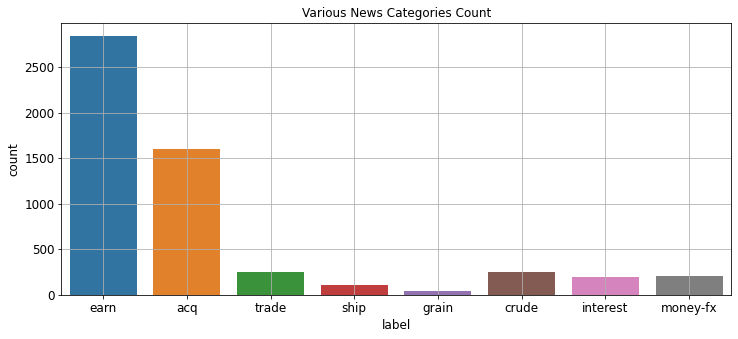

In [5]:
#countplot of news categories
sns.countplot(news['label'])
plt.title('Various News Categories Count')
plt.grid()
plt.show()

## _Text Cleaning & Normalization_

In [6]:
'''
Get the article text into a list, for easy text cleanup and manipulation.
'''
articles = news['text'].values

In [7]:
''' check the data type of articles '''
type(articles)

numpy.ndarray

In [8]:
''' view the first 3 articles '''
articles[:3]

array(['champion products ch approves stock split champion products inc said its board of directors approved a two for one stock split of its common shares for shareholders of record as of april the company also said its board voted to recommend to shareholders at the annual meeting april an increase in the authorized capital stock from five mln to mln shares reuter ',
       'computer terminal systems cpml completes sale computer terminal systems inc said it has completed the sale of shares of its common stock and warrants to acquire an additional one mln shares to sedio n v of lugano switzerland for dlrs the company said the warrants are exercisable for five years at a purchase price of dlrs per share computer terminal said sedio also has the right to buy additional shares and increase its total holdings up to pct of the computer terminal s outstanding common stock under certain circumstances involving change of control at the company the company said if the conditions occur the warr

In [9]:
'''convert  to lower case'''
articles = [art.lower() for art in articles]

In [10]:
'''check the articles in lower case'''
articles[:5]

['champion products ch approves stock split champion products inc said its board of directors approved a two for one stock split of its common shares for shareholders of record as of april the company also said its board voted to recommend to shareholders at the annual meeting april an increase in the authorized capital stock from five mln to mln shares reuter ',
 'computer terminal systems cpml completes sale computer terminal systems inc said it has completed the sale of shares of its common stock and warrants to acquire an additional one mln shares to sedio n v of lugano switzerland for dlrs the company said the warrants are exercisable for five years at a purchase price of dlrs per share computer terminal said sedio also has the right to buy additional shares and increase its total holdings up to pct of the computer terminal s outstanding common stock under certain circumstances involving change of control at the company the company said if the conditions occur the warrants would b

In [11]:
'''tokenize the articles '''
articles_tokens = [word_tokenize(art) for art in articles]

In [12]:
articles_tokens[0]

['champion',
 'products',
 'ch',
 'approves',
 'stock',
 'split',
 'champion',
 'products',
 'inc',
 'said',
 'its',
 'board',
 'of',
 'directors',
 'approved',
 'a',
 'two',
 'for',
 'one',
 'stock',
 'split',
 'of',
 'its',
 'common',
 'shares',
 'for',
 'shareholders',
 'of',
 'record',
 'as',
 'of',
 'april',
 'the',
 'company',
 'also',
 'said',
 'its',
 'board',
 'voted',
 'to',
 'recommend',
 'to',
 'shareholders',
 'at',
 'the',
 'annual',
 'meeting',
 'april',
 'an',
 'increase',
 'in',
 'the',
 'authorized',
 'capital',
 'stock',
 'from',
 'five',
 'mln',
 'to',
 'mln',
 'shares',
 'reuter']

In [13]:
''' remove the stop words from the data '''
stop_words = stopwords.words('english')

def remove_stopwords(tokens):
    result = [token for token in tokens if token not in stop_words]
    return result

articles_nostop = [remove_stopwords(art) for art in articles_tokens]

In [14]:
articles_nostop[0]

['champion',
 'products',
 'ch',
 'approves',
 'stock',
 'split',
 'champion',
 'products',
 'inc',
 'said',
 'board',
 'directors',
 'approved',
 'two',
 'one',
 'stock',
 'split',
 'common',
 'shares',
 'shareholders',
 'record',
 'april',
 'company',
 'also',
 'said',
 'board',
 'voted',
 'recommend',
 'shareholders',
 'annual',
 'meeting',
 'april',
 'increase',
 'authorized',
 'capital',
 'stock',
 'five',
 'mln',
 'mln',
 'shares',
 'reuter']

## _Feature Engineering_

In [15]:
''' Instantiate the vectorizer  '''
vectorizer = TfidfVectorizer(max_features=3000)

In [16]:
''' The vectorizer needs the strings, not vectors. Join the tokens into the string for each article.'''
articles_string = [' '.join(art) for art in articles_tokens]

In [17]:
articles_string[0]

'champion products ch approves stock split champion products inc said its board of directors approved a two for one stock split of its common shares for shareholders of record as of april the company also said its board voted to recommend to shareholders at the annual meeting april an increase in the authorized capital stock from five mln to mln shares reuter'

In [18]:
articles_tfidf = vectorizer.fit_transform(articles_string)
articles_tfidf.shape

(5485, 3000)

In [19]:
''' Convert it to dense matrix:  The output is currently a sparse matrix, convert it to a dense matrix for ease of access '''
tfidf_dense = articles_tfidf.todense()
type(tfidf_dense)

numpy.matrix

In [20]:
tfidf_dense.shape

(5485, 3000)

In [21]:
''' In this representation, we can now compute the similarity between any two articles which are now vectors. '''

#check the cosine similarity between row 3 and row 4
cosine_similarity(tfidf_dense[3,:],tfidf_dense[4,:])

array([[0.48572372]])

In [22]:
#print the corresponding articles 
articles_string[3:5]

['am international inc am nd qtr jan oper shr loss two cts vs profit seven cts oper shr profit vs profit revs mln vs mln avg shrs mln vs mln six mths oper shr profit nil vs profit cts oper net profit vs profit revs mln vs mln avg shrs mln vs mln note per shr calculated after payment of preferred dividends results exclude credits of or four cts and or nine cts for qtr and six mths vs or six cts and or cts for prior periods from operating loss carryforwards reuter',
 'brown forman inc bfd th qtr net shr one dlr vs cts net mln vs mln revs mln vs mln nine mths shr dlrs vs dlrs net mln vs mln revs billion vs mln reuter']

In [23]:
''' Search engine: Find the five most relevant articles for any given query, fetch the text against them. 
    Define a function that does the following: '''

def get_top5_articles(query):
    '''function to retrieve the top 5 similar articles based on a query '''
    target_vector = vectorizer.transform([query])
    
    #define the list to store the similarity scores
    similarity_scores = []
    
    for index,vector in enumerate(tfidf_dense):
        similarity = cosine_similarity(target_vector,tfidf_dense[index,:])[0][0] #[0][0] to retrieve only the values from the returned array
        similarity_scores.append(similarity)
        
    similarities = pd.Series(similarity_scores)
    top5_scores = similarities.sort_values(ascending=False).head(5)

    top5_index = top5_scores.index.values
    
    print("Search query: " + query + "\n")    

    for index in top5_index:

        print("Similarity score:" + str(round(top5_scores[index],2)) + "\n" + "Article text: " + articles_string[index] + "\n")
    

In [24]:
get_top5_articles("shipping")

Search query: shipping

Similarity score:0.36
Article text: correction two brazil shipping firms settle in today s sao paulo story headlined two brazilian shipping firms settle with strikers please read in second para offer from the companies global and flumar instead of offer from the companies globo and flumar corrects name of first company reuter

Similarity score:0.35
Article text: kenya signs pact to establish own shipping line kenya has signed an agreement with british and german interests to establish a shipping line that will handle pct of the country s external trade sources close to the deal said the state owned kenya ports authority kpa signed an agreement with the hamburg based shipping line unimar seetransport to establish the kenya national shipping line with an initial capital of mln shillings sources said kpa will hold pct of the shares in the new company the line will initially charter vessels to operate services between mombasa and the main ports of industrial europe 